## Score: 31

## Comment: 

<font color=Red>
Q1.[11] Good job!
<br><br>
Q2.[10+10] Correct
<br><br>
</font>

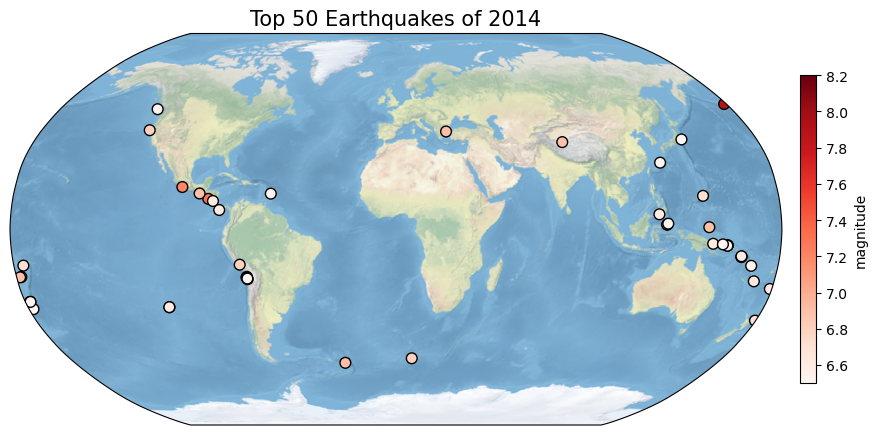

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

#读取数据 
file_name = 'usgs_earthquakes.csv'
df = pd.read_csv(file_name)

#按 mag (震级) 从大到小排序，取前50个
top50 = df.sort_values(by='mag', ascending=False).head(50)

#绘图 
plt.figure(figsize=(12, 8))

# 设置地图投影为 Robinson (圆角地图)，并添加卫星背景
ax = plt.axes(projection=ccrs.Robinson())
ax.stock_img()  # 添加地球背景图

#绘制散点
#x=经度, y=纬度, c=颜色(震级), transform=告诉程序这是经纬度数据
sc = ax.scatter(top50['longitude'], top50['latitude'],
                c=top50['mag'], 
                s=60,                   # 点的大小
                cmap='Reds',            # 红色系
                edgecolors='k',         # 黑色边框
                transform=ccrs.PlateCarree())

#添加注释
plt.title('Top 50 Earthquakes of 2014', fontsize=15)

#添加色标 
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', shrink=0.5, pad=0.02)
cbar.set_label('magnitude')

plt.show()

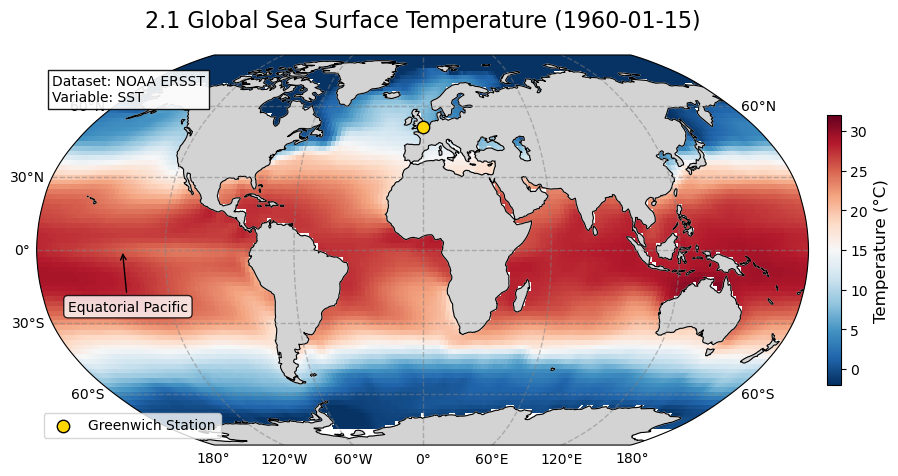

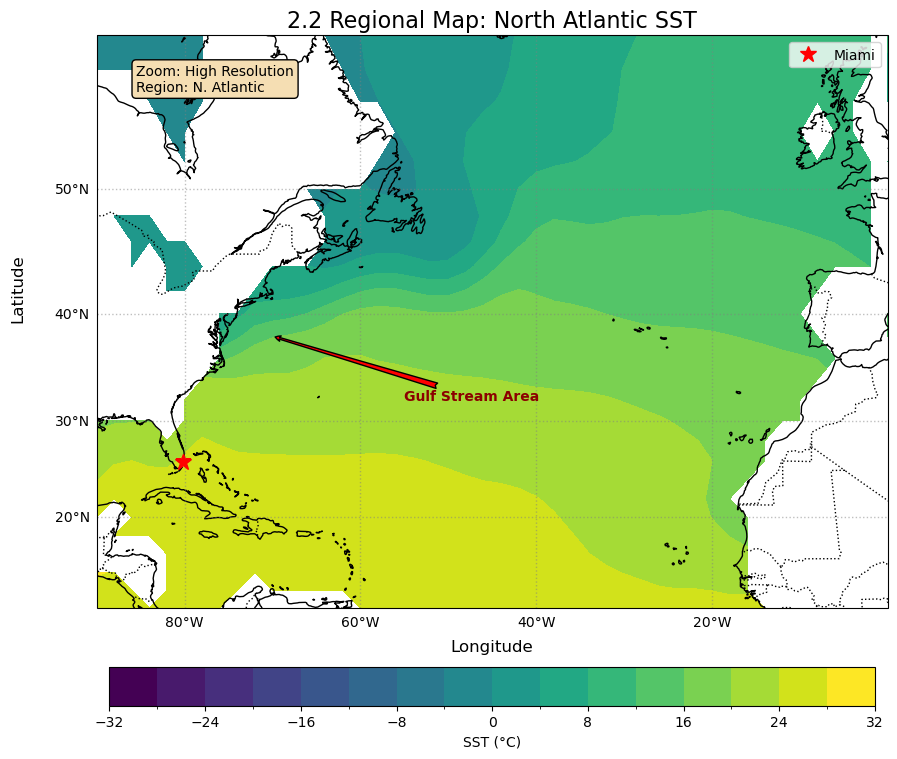

In [9]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

#读取数据 
file_path = 'NOAA_NCDC_ERSST_v3b_SST.nc'
ds = xr.open_dataset(file_path)

#提取数据：取第一个时间步 (1960-01-15)
sst_data = ds['sst'].isel(time=0)
time_str = str(sst_data.time.values)[:10]


#作业 2.1: Global Map (全球地图)
fig = plt.figure(figsize=(12, 7))

#投影
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Robinson())

#陆地掩膜和海岸线
ax.add_feature(cfeature.LAND, color='lightgray', zorder=1)
ax.coastlines(resolution='110m', linewidth=0.8, color='black', zorder=2)

#绘图 (SST)
mesh = sst_data.plot.pcolormesh(
    ax=ax,
    transform=ccrs.PlateCarree(),
    cmap='RdBu_r',       # 冷暖色调
    add_colorbar=False,  # 手动添加色标
    vmin=-2, vmax=32,
    zorder=0
)

#网格线
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')
#经纬度标签
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 10}
gl.ylabel_style = {'size': 10}

#标题
plt.title(f'2.1 Global Sea Surface Temperature ({time_str})', fontsize=16, pad=20)

#色标
cbar = plt.colorbar(mesh, ax=ax, orientation='vertical', shrink=0.5, pad=0.02)
cbar.set_label('Temperature (°C)', fontsize=12)

#注释 (箭头指向赤道太平洋)
ax.annotate('Equatorial Pacific', xy=(-140, 0), xytext=(-170, -25),
            xycoords=ccrs.PlateCarree()._as_mpl_transform(ax),
            arrowprops=dict(facecolor='black', arrowstyle='->'),
            transform=ccrs.PlateCarree(), fontsize=10,
            bbox=dict(boxstyle="round", fc="white", alpha=0.8))

#文本框 (显示数据源)
ax.text(0.02, 0.95, "Dataset: NOAA ERSST\nVariable: SST", 
        transform=ax.transAxes, fontsize=10, verticalalignment='top',
        bbox=dict(boxstyle='square', facecolor='white', alpha=0.9))

#图例
ax.scatter(0, 51, color='gold', s=80, transform=ccrs.PlateCarree(), 
           label='Greenwich Station', edgecolors='black', zorder=10)
plt.legend(loc='lower left')
plt.show()



# 作业 2.2: Regional Map (区域地图) 
fig2 = plt.figure(figsize=(10, 8))

#投影
ax2 = fig2.add_subplot(1, 1, 1, projection=ccrs.Mercator())

#设置区域：北大西洋
extent = [-90, 0, 10, 60] # [西经, 东经, 南纬, 北纬]
ax2.set_extent(extent, crs=ccrs.PlateCarree())

#国界和海岸线
ax2.coastlines(resolution='50m', linewidth=1, color='black') 
ax2.add_feature(cfeature.BORDERS, linestyle=':')

#绘图 (等高线填色)
contour = sst_data.plot.contourf(
    ax=ax2,
    transform=ccrs.PlateCarree(),
    levels=20,
    cmap='viridis',
    add_colorbar=False
)

#网格
gl2 = ax2.gridlines(draw_labels=True, crs=ccrs.PlateCarree(), 
                    linewidth=1, color='gray', alpha=0.5, linestyle=':')
gl2.top_labels = False
gl2.right_labels = False

#手动添加轴标签文字 (Cartopy gridlines 负责显示刻度数字)
ax2.text(-0.1, 0.5, 'Latitude', va='bottom', ha='center',
        rotation='vertical', transform=ax2.transAxes, fontsize=12)
ax2.text(0.5, -0.08, 'Longitude', va='bottom', ha='center',
        transform=ax2.transAxes, fontsize=12)

#标题
plt.title('2.2 Regional Map: North Atlantic SST', fontsize=16)

#色标
cbar2 = plt.colorbar(contour, ax=ax2, orientation='horizontal', shrink=0.8, pad=0.08)
cbar2.set_label('SST (°C)')

#注释 (墨西哥湾流)
ax2.annotate('Gulf Stream Area', xy=(-70, 38), xytext=(-55, 32),
             xycoords=ccrs.PlateCarree()._as_mpl_transform(ax2),
             arrowprops=dict(facecolor='red', arrowstyle='fancy'),
             transform=ccrs.PlateCarree(), color='darkred', weight='bold')

#文本框
ax2.text(0.05, 0.95, "Zoom: High Resolution\nRegion: N. Atlantic", 
         transform=ax2.transAxes, verticalalignment='top',
         bbox=dict(facecolor='wheat', alpha=1, boxstyle='round'))

#图例
ax2.plot(-80.2, 25.8, 'r*', markersize=12, transform=ccrs.PlateCarree(), 
         label='Miami', zorder=10)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()